In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('output.csv')
#dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:3].astype(float)
Qb = dataset[:,10].reshape(-1, 1)

In [3]:
Qb_log = np.log10(np.absolute(Qb))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Qb_log, test_size=0.1)
n_features = X_train.shape[1]

In [6]:
model = Sequential()
model.add(Dense(5, activation='tanh',  kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(15, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(20, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(25, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(25, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(25, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))

In [7]:
model.compile(optimizer='adam', loss='mse')

In [8]:
model.fit(X_ntrain, y_ntrain, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000
802/802 [==============================] - 1s 853us/step - loss: 13.7577
Epoch 2/1000
802/802 [==============================] - 1s 840us/step - loss: 0.0142
Epoch 3/1000
802/802 [==============================] - 1s 827us/step - loss: 0.0141
Epoch 4/1000
802/802 [==============================] - 1s 828us/step - loss: 0.0141
Epoch 5/1000
802/802 [==============================] - 1s 896us/step - loss: 0.0141
Epoch 6/1000
802/802 [==============================] - 1s 831us/step - loss: 0.0140
Epoch 7/1000
802/802 [==============================] - ETA: 0s - loss: 0.014 - 1s 807us/step - loss: 0.0140
Epoch 8/1000
802/802 [==============================] - 1s 794us/step - loss: 0.0139
Epoch 9/1000
802/802 [==============================] - 1s 787us/step - loss: 0.0123
Epoch 10/1000
802/802 [==============================] - 1s 809us/step - loss: 0.0015
Epoch 11/1000
802/802 [==============================] - 1s 799us/step - loss: 7.1942e-04
Epoch 12/1000
802/802 [===========

In [9]:
error = model.evaluate(X_test, y_test, verbose=1)
print('MSE: %.3f, RMSE: %.3f' % (error, np.sqrt(error)))

90/90 [==============================] - 0s 853us/step - loss: 5.2260e-07
MSE: 0.000, RMSE: 0.001


In [10]:
model.save("Body_charge.h5")

In [11]:
from keras.models import load_model
Body_charge = load_model("Body_charge.h5")

In [12]:
Y_predict = Body_charge.predict(X_test)

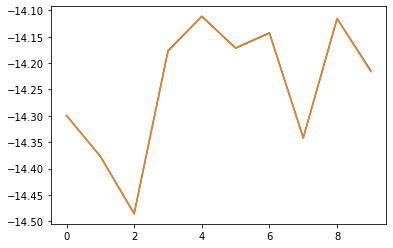

In [13]:
plt.plot(y_test[:10])
plt.plot(Y_predict[:10])